<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1JlbYwtVtSaZL1gsFfTrIOTFbt-ekvVsQ" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Estimación de l aprofundidad


Mira esto para completar: https://huggingface.co/docs/transformers/main/tasks/monocular_depth_estimation



In [ ]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.4 MB/s eta 0:00:00


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from transformers import pipeline

checkpoint = "vinvino02/glpn-nyu"
depth_estimator = pipeline("depth-estimation", model=checkpoint, device=0);

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Saving dogandbike.jpeg to dogandbike (1).jpeg


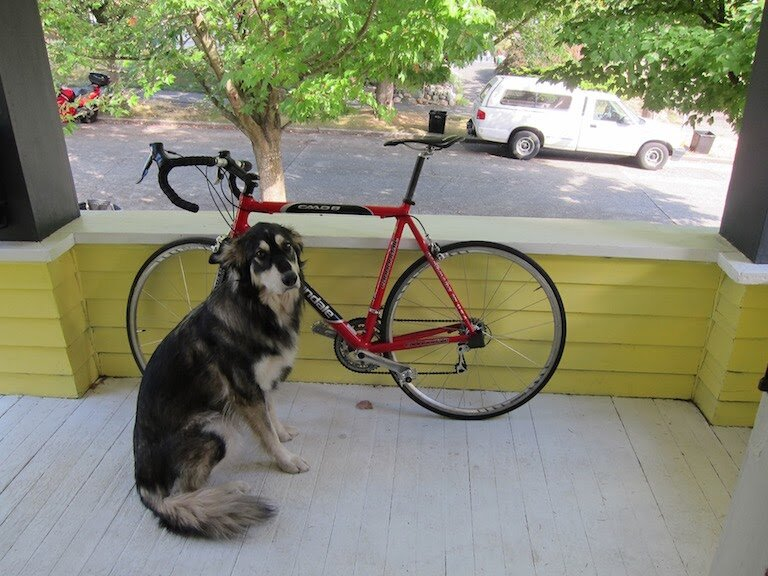

In [ ]:
from PIL import Image

from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0];

image = Image.open(filename)
image


In [ ]:
predictions = depth_estimator(image)

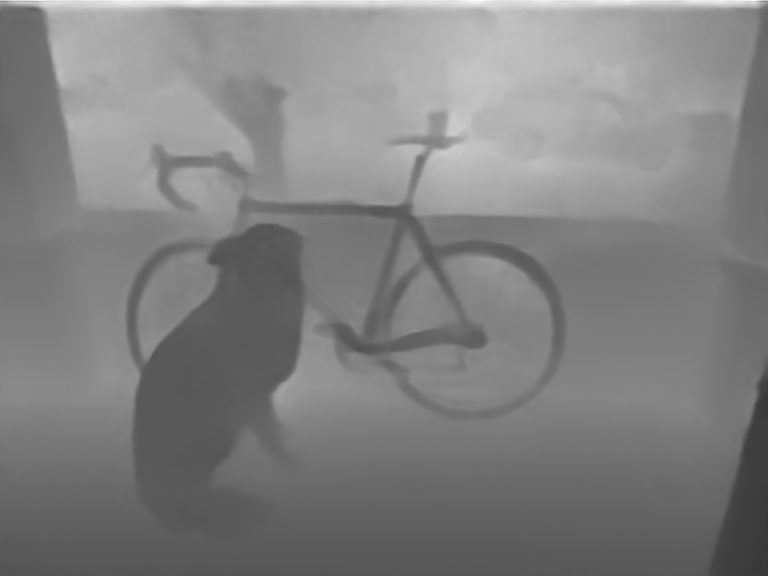

In [ ]:
predictions["depth"]


In [ ]:
#!pip install -q ultralytics
!pip install -q ipycanvas==0.11


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.3/609.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.5 MB/s eta 0:00:00


In [ ]:
#from ultralytics import YOLO
#
#model = YOLO('yolov8n.pt')
#model = YOLO('yolov8x.pt')


100%|██████████| 6.23M/6.23M [00:00<00:00, 270MB/s]


In [ ]:
from base64 import b64encode

def embed_video(path, width):
    with open(path,'rb') as fd:
         data = b64encode(fd.read()).decode("utf-8")
         return HTML("""<video width={0} controls><source src='data:simul2/mp4;base64,{1}' type='video/mp4'></video>""".format(width,data))


In [ ]:
# SEA UN VÍDEO

import cv2
import numpy as np
import PIL

from google.colab.patches import cv2_imshow

from ultralytics import YOLO

import matplotlib.pyplot as plt

from IPython.display import display, HTML

from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0];

def resize_frame(img, custom_width=600, onlydims=False):
    height, width, _ = img.shape
    desired_width = custom_width;
    width_percent = (custom_width / float(width));
    desired_height = int((float(height) * float(width_percent)));
    if not onlydims: return cv2.resize(img, (desired_width, desired_height));
    else:            return (desired_width, desired_height);

cap = cv2.VideoCapture(filename)

if cap.isOpened():
    ret, frame = cap.read()
    rescaled_frame = resize_frame(frame)
    (h, w) = rescaled_frame.shape[:2]
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    writer = cv2.VideoWriter('video_input.mp4',fourcc, 15.0,(w, h), True)
    while ret:
          rescaled_frame = resize_frame(frame)
          writer.write(rescaled_frame)
          ret, frame = cap.read()
    writer.release()
    filename='video_input.mp4'
    cap.release()
else:
    print("Camera is not opened")


Saving alejándose.mp4 to alejándose.mp4


In [ ]:
cap = cv2.VideoCapture(filename);

fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

tframes=0;
ok, _ = cap.read()
while ok:
      tframes+=1;
      ok, _ = cap.read()

cap.release()

print(f"El vídeo tiene {tframes} frames en total; a {fps} frames por segundo, eso es {tframes/fps} segundos");

El vídeo tiene 841 frames en total; a 15 frames por segundo, eso es 56.06666666666667 segundos


Leyendo de video_input.mp4 y escribiendo a video_output.mp4


'Frame 100%'

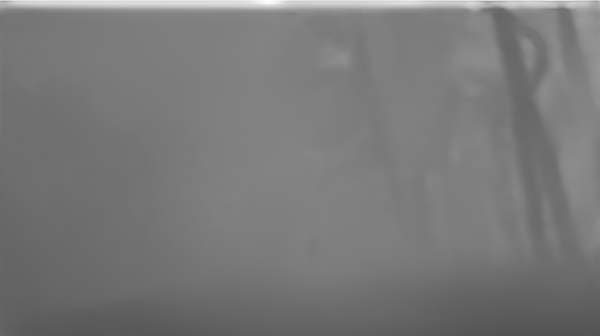

CPU times: user 2min 24s, sys: 1.35 s, total: 2min 25s
Wall time: 2min 31s


In [ ]:
%%time

import time

print(f"Leyendo de {filename} y escribiendo a video_output.mp4");

cap = cv2.VideoCapture(filename);
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

ok, frame = cap.read()

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
writer = cv2.VideoWriter('video_output.mp4',fourcc, fps, (width, height), True)

tbf=1/(tframes/fps);

count=0;
while ok:
      count+=1;
      display(f"Frame {int(100*count/tframes)}%", display_id="percent");
      image = PIL.Image.fromarray(frame)
      predictions = depth_estimator(image)
      annotated_image = predictions["depth"]
      display(annotated_image, display_id="imagen")
      open_cv_image = np.array(annotated_image)
      open_cv_image = cv2.merge((open_cv_image,open_cv_image,open_cv_image))
      #open_cv_image = open_cv_image[:, :, ::-1].copy()
      writer.write(np.array(open_cv_image))
      ok, frame = cap.read()

writer.release()

cap.release()